# Vertical transmission: sensitivity analysis

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shutil

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"
plot_manuscript = "../manuscript/plots/"

# Genes

In [38]:
vars = ['iteration', 'p_genetic_variance', 'p_vertical_trans_variance', 
    'p_random_mating', 'p_fertility_factor']
df = pd.read_csv(output_path + "results-bmi-mating-genes.csv", sep = ";")
params = pd.read_csv(output_path + "param-bmi-mating-genes.csv", sep = ";")
params = params. drop_duplicates(subset=vars)

cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
df = df.merge(params, on = ["iteration"])

<ipython-input-38-baf6db00dad0>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [98]:
df.loc[(df.p_genetic_variance == 0.05)  & (df.p_random_mating == 0.1),['iteration', 'average_bmi']].average_bmi.std()

0.10564504018133328

'../manuscript/plots/prop-bmi-genes.pdf'

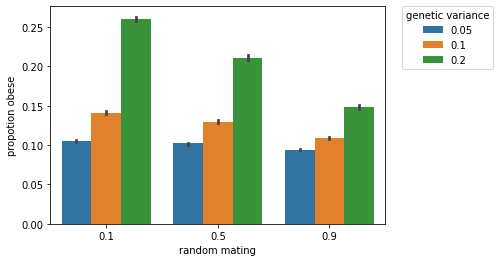

In [88]:
p = sns.barplot(y='g4', x='p_random_mating', hue='p_genetic_variance',data=df, estimator=np.median);
p.set_ylabel("propotion obese", fontsize = 10)
p.set_xlabel("random mating", fontsize = 10)
plt.legend(title='genetic variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "prop-bmi-genes.pdf", bbox_inches='tight')
shutil.copy(plots_path + "prop-bmi-genes.pdf", plot_manuscript)

'../manuscript/plots/average-bmi-genes.pdf'

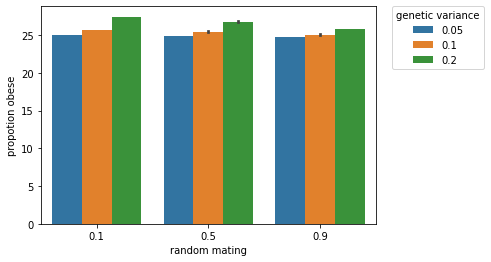

In [102]:
p = sns.barplot(y='average_bmi', x='p_random_mating', hue='p_genetic_variance',data=df, estimator=np.median, ci=95);
p.set_ylabel("propotion obese", fontsize = 10)
p.set_xlabel("random mating", fontsize = 10)
plt.legend(title='genetic variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "average-bmi-genes.pdf", bbox_inches='tight')
shutil.copy(plots_path + "average-bmi-genes.pdf", plot_manuscript)